In [7]:
from matplotlib import pyplot as plt
import nsmod
import os 
import numpy as np
from numpy import sin, cos, tan
from matplotlib.ticker import MultipleLocator 
%matplotlib inline

from nsmod.switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Model

## Pulse amplitude 

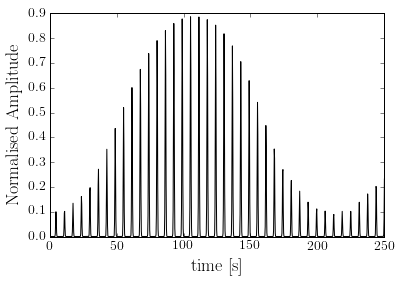

In [8]:
epsI1=0.0
epsI3=3.0e-2
epsA=0.0
omega0=1
error=1e-12
T=250 
chi0 = 30.0
AnomTorque=True
a0=10.0
upsilon=0.0
n=10000
cleanup=False
Phi0=0
Theta0=45
sigmaB=0.2

Phi0 = np.radians(Phi0)
Theta0 = np.radians(Theta0)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)
    
ax = Plot.Amplitude(file_name, Phi0, Theta0, sigmaB)
plt.savefig("img/intensity_variation.pdf")
plt.show()

## Cosine and constant

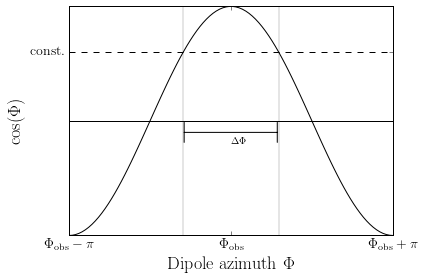

In [12]:
from numpy import pi
ax = plt.subplot(111)

x = np.linspace(-pi, pi, 100)
ax.axhline(0, ls="-", color="k")
ax.plot(x, np.cos(x))
ax.set_xlim(-pi, pi)
ax.set_xticks([-pi, 0, pi])
ax.set_xticklabels(["$\Phi_{\mathrm{obs}} - \pi$", 
                    "$\Phi_{\mathrm{obs}}$",
                    "$\Phi_{\mathrm{obs}} + \pi$"])
k = 0.6
ax.axhline(k, ls="--", color="k")
ax.set_yticks([k])
ax.set_yticklabels(['const.'])

x_fill = np.linspace(np.arccos(k), -np.arccos(k), 100)
#ax.fill_between(x_fill, 0, np.cos(x_fill), color="k", alpha=0.5)

ax.set_xlabel("Dipole azimuth $\Phi$")
ax.set_ylabel("$\cos(\Phi)$")

ax.annotate("",
            xy=(-np.arccos(k)-0.02, -0.1), xycoords='data',
            xytext=(np.arccos(k)+0.01, -0.1), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),
            )
ax.annotate("$\Delta\Phi$",
            xy=(0, -0.2), xycoords='data',
            xytext=(0, -0.2), textcoords='data', 
            )

ax.axvline(-np.arccos(k), lw=0.2, color="k")
ax.axvline(np.arccos(k), lw=0.2, color="k")
plt.tight_layout()
plt.savefig("img/CosineIllustration.pdf")
plt.show()

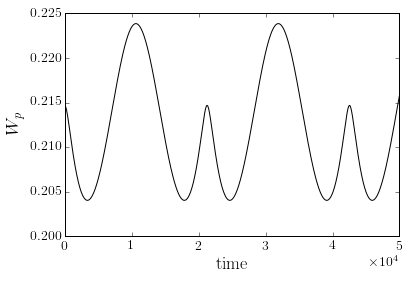

In [10]:
epsI1=0.0
epsI3=3.0e-4
epsA=0.0
omega0=1.
T=5e4
chi0 = 12.0
a0=10
AnomTorque=True
upsilon=0.0
n=100000
cleanup=False,
Theta0=10
sigmaB = 0.3
eta=0.01

Theta0 = np.radians(Theta0)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)

ax = Plot.PulseWidth(file_name, Theta0, sigmaB , p=50,
                      eta=eta, ls="-")
plt.savefig("img/Pulse_width_modulation.pdf")
plt.show()